IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

IMPORTING DATASET

In [2]:
df=pd.read_csv("stress.csv")
df

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.800000,1521614353,5,1.806818,...,1.0000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.000000,1527009817,4,9.429737,...,1.1250,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.800000,1535935605,2,7.769821,...,1.0000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.600000,1516429555,0,2.667798,...,1.0000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.800000,1539809005,24,7.554238,...,1.0000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,relationships,7oee1t,"[35, 40]","* Her, a week ago: Precious, how are you? (I i...",1713,0,1.000000,1515187044,13,-1.369333,...,1.4000,1.0000,1.0,1.71133,1.45301,2.00304,0.84,16,0.254444,0.552066
2834,ptsd,9p4ung,"[20, 25]",I don't have the ability to cope with it anymo...,1133,1,1.000000,1539827412,33,9.425478,...,1.0000,1.0000,1.0,1.65003,1.56842,1.81527,0.96,6,8.640664,-0.220370
2835,anxiety,9nam6l,"(5, 10)",In case this is the first time you're reading ...,10442,0,1.000000,1539269312,2,11.060675,...,1.1250,1.1250,1.0,1.79768,1.49074,1.92286,1.00,1,9.951524,0.045455
2836,almosthomeless,5y53ya,"[5, 10]",Do you find this normal? They have a good rela...,1834,0,0.571429,1488938143,4,2.421912,...,1.1111,1.1429,1.0,1.71642,1.57627,1.89972,0.75,7,4.036765,0.159722


DATA EXPLORATION

In [3]:
df.shape

(2838, 116)

In [4]:
df.columns

Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)

In [5]:
df.dtypes

subreddit                    object
post_id                      object
sentence_range               object
text                         object
id                            int64
                             ...   
lex_dal_avg_pleasantness    float64
social_upvote_ratio         float64
social_num_comments           int64
syntax_fk_grade             float64
sentiment                   float64
Length: 116, dtype: object

In [6]:
df.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [7]:
df.tail()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
2833,relationships,7oee1t,"[35, 40]","* Her, a week ago: Precious, how are you? (I i...",1713,0,1.000000,1515187044,13,-1.369333,...,1.4000,1.0000,1.0,1.71133,1.45301,2.00304,0.84,16,0.254444,0.552066
2834,ptsd,9p4ung,"[20, 25]",I don't have the ability to cope with it anymo...,1133,1,1.000000,1539827412,33,9.425478,...,1.0000,1.0000,1.0,1.65003,1.56842,1.81527,0.96,6,8.640664,-0.220370
2835,anxiety,9nam6l,"(5, 10)",In case this is the first time you're reading ...,10442,0,1.000000,1539269312,2,11.060675,...,1.1250,1.1250,1.0,1.79768,1.49074,1.92286,1.00,1,9.951524,0.045455
2836,almosthomeless,5y53ya,"[5, 10]",Do you find this normal? They have a good rela...,1834,0,0.571429,1488938143,4,2.421912,...,1.1111,1.1429,1.0,1.71642,1.57627,1.89972,0.75,7,4.036765,0.159722
2837,ptsd,5y25cl,"[0, 5]",I was talking to my mom this morning and she s...,961,1,0.571429,1488909516,2,0.835254,...,1.0000,1.0000,1.0,1.68891,1.44615,1.89707,0.76,2,2.412000,0.016667


**CONCLUSION: we actually only need columns text and label for stress detection nlp modelling**

In [8]:
df=df[['text','label']]
df

,text,label
0,"He said he had not felt that way before, sugge...",1
1,"Hey there r/assistance, Not sure if this is th...",0
2,My mom then hit me with the newspaper and it s...,1
3,"until i met my new boyfriend, he is amazing, h...",1
4,October is Domestic Violence Awareness Month a...,1
...,...,...
2833,"* Her, a week ago: Precious, how are you? (I i...",0
2834,I don't have the ability to cope with it anymo...,1
2835,In case this is the first time you're reading ...,0
2836,Do you find this normal? They have a good rela...,0


**DATA WRANGLING**

In [9]:
# MISSING VALUES
df.isna().sum()

text     0
label    0
dtype: int64

In [10]:
# DUPLICATE VALUES
df.duplicated().sum()

15

In [11]:
df.drop_duplicates(inplace=True)
df

,text,label
0,"He said he had not felt that way before, sugge...",1
1,"Hey there r/assistance, Not sure if this is th...",0
2,My mom then hit me with the newspaper and it s...,1
3,"until i met my new boyfriend, he is amazing, h...",1
4,October is Domestic Violence Awareness Month a...,1
...,...,...
2833,"* Her, a week ago: Precious, how are you? (I i...",0
2834,I don't have the ability to cope with it anymo...,1
2835,In case this is the first time you're reading ...,0
2836,Do you find this normal? They have a good rela...,0


In [12]:
# CORRECTING THE INDEX VALUE
df.reset_index(drop=True,inplace=True)
df

,text,label
0,"He said he had not felt that way before, sugge...",1
1,"Hey there r/assistance, Not sure if this is th...",0
2,My mom then hit me with the newspaper and it s...,1
3,"until i met my new boyfriend, he is amazing, h...",1
4,October is Domestic Violence Awareness Month a...,1
...,...,...
2818,"* Her, a week ago: Precious, how are you? (I i...",0
2819,I don't have the ability to cope with it anymo...,1
2820,In case this is the first time you're reading ...,0
2821,Do you find this normal? They have a good rela...,0


DATA ANALYSIS

In [13]:
# OBSERVING THE OUTPUT LABEL
df['label'].value_counts()

label
1    1485
0    1338
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

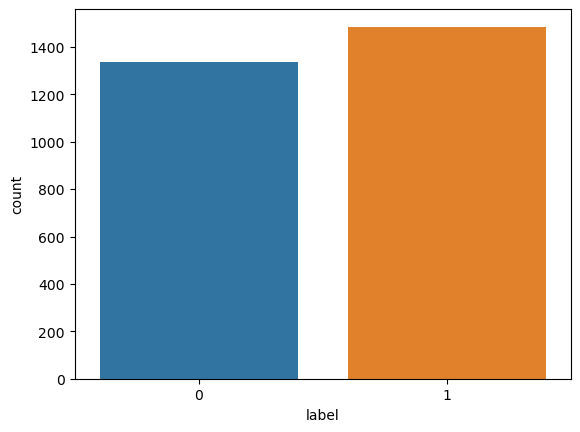

In [14]:
sns.countplot(x='label',data=df)

In [15]:
# MAPPING COLUMN LABEL
df['label']=df['label'].map({0:'NO STRESS',1:'STRESS'})
df

,text,label
0,"He said he had not felt that way before, sugge...",STRESS
1,"Hey there r/assistance, Not sure if this is th...",NO STRESS
2,My mom then hit me with the newspaper and it s...,STRESS
3,"until i met my new boyfriend, he is amazing, h...",STRESS
4,October is Domestic Violence Awareness Month a...,STRESS
...,...,...
2818,"* Her, a week ago: Precious, how are you? (I i...",NO STRESS
2819,I don't have the ability to cope with it anymo...,STRESS
2820,In case this is the first time you're reading ...,NO STRESS
2821,Do you find this normal? They have a good rela...,NO STRESS


DOWNLOADING PACKAGES FOR NLP

In [16]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prasa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prasa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prasa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

NLP PREPROCESSING

In [17]:
from nltk import TweetTokenizer
tk=TweetTokenizer()
import re
from nltk import word_tokenize
from nltk import SnowballStemmer
snow=SnowballStemmer('english')
from nltk.corpus import stopwords
stop=stopwords.words('english')

In [18]:
def nlp(text):
  text=str(text).lower()
  text=re.sub('[^a-zA-Z0-9]+',' ',text)
  text=[words for words in text.split(' ') if len(words)>=3]
  text=' '.join(text)
  text=[words for words in text.split(' ') if words not in stop]
  text=' '.join(text)
  text=[snow.stem(word) for word in text.split(" ")]
  text=' '.join(text)
  return text 

In [19]:
df['text']=df['text'].apply(nlp)
df

,text,label
0,said felt way sugget rest trigger ahead youi h...,STRESS
1,hey assist sure right place post goe current s...,NO STRESS
2,mom hit newspap shock would know like play hit...,STRESS
3,met new boyfriend amaz kind sweet good student...,STRESS
4,octob domest violenc awar month domest violenc...,STRESS
...,...,...
2818,week ago precious ignor jan happi year preciou...,NO STRESS
2819,abil cope anymor tri lot thing trigger shut wo...,STRESS
2820,case first time read post look peopl will comp...,NO STRESS
2821,find normal good relationship main problem see...,NO STRESS


In [20]:
# VECTORIZATION
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data=vec.fit_transform(df.text)
print(train_data)

  (0, 3206)	0.09205181168018994
  (0, 4772)	0.09892738913067695
  (0, 3013)	0.07775737837158424
  (0, 3066)	0.11119049812429162
  (0, 7201)	0.09766427753428537
  (0, 2839)	0.19106220644906127
  (0, 6556)	0.12003278216721838
  (0, 5024)	0.16984888173275378
  (0, 4475)	0.0631407691529167
  (0, 364)	0.18167516072194972
  (0, 3056)	0.10319168476162545
  (0, 6902)	0.14958063939609045
  (0, 3355)	0.16984888173275378
  (0, 5661)	0.12057754385140318
  (0, 5188)	0.09237561141126892
  (0, 2226)	0.08331695847216604
  (0, 5447)	0.12836731467978296
  (0, 3717)	0.13258829635351665
  (0, 2320)	0.06318693328262612
  (0, 1549)	0.07175678934820015
  (0, 5934)	0.07537022905357812
  (0, 342)	0.11391732891558509
  (0, 4339)	0.08961257841810558
  (0, 6414)	0.1308065479418673
  (0, 5056)	0.17501494578613164
  :	:
  (2821, 5637)	0.3213505176681194
  (2821, 2864)	0.11623368502906352
  (2821, 4465)	0.1341663561277422
  (2821, 7250)	0.08931700806539052
  (2821, 4165)	0.13440150158169556
  (2821, 1549)	0.10458617

SEPERATING INPUT AND OUTPUT

In [21]:
x=train_data
y=df['label'].values

SEPERATING TRAINING AND TESTING DATA

In [22]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1976, 7285) (847, 7285) (1976,) (847,)


In [23]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1976, 7285) (847, 7285) (1976,) (847,)


MODEL CREATION AND PERFORMANCE EVALUATION

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay

KNN CLASSIFIER
CONFUSION MATRIX:
 [[210 195]
 [106 336]]
ACCURACY SCORE: 0.6446280991735537
CLASSIFICATION REPORT:
               precision    recall  f1-score   support

   NO STRESS       0.66      0.52      0.58       405
      STRESS       0.63      0.76      0.69       442

    accuracy                           0.64       847
   macro avg       0.65      0.64      0.64       847
weighted avg       0.65      0.64      0.64       847



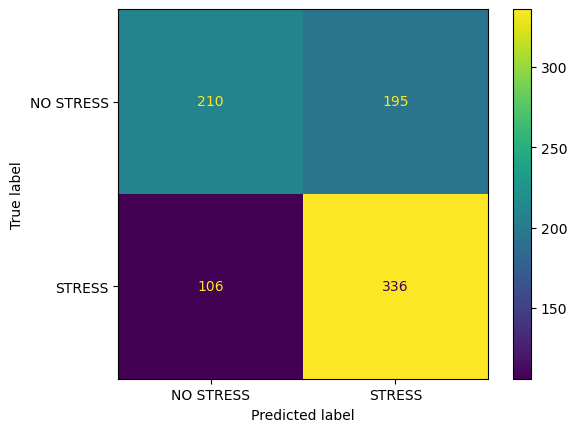

In [26]:
print("KNN CLASSIFIER")
model_knn=KNeighborsClassifier()
model_knn.fit(x_train,y_train)
y_knn=model_knn.predict(x_test)
print("CONFUSION MATRIX:\n",confusion_matrix(y_test,y_knn))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_knn))
print("ACCURACY SCORE:",accuracy_score(y_test,y_knn))
print("CLASSIFICATION REPORT:\n",classification_report(y_test,y_knn))

NAIVE-BAYES
CONFUSION MATRIX:
 [[172 233]
 [ 23 419]]
ACCURACY SCORE: 0.6977567886658795
CLASSIFICATION REPORT:
               precision    recall  f1-score   support

   NO STRESS       0.88      0.42      0.57       405
      STRESS       0.64      0.95      0.77       442

    accuracy                           0.70       847
   macro avg       0.76      0.69      0.67       847
weighted avg       0.76      0.70      0.67       847



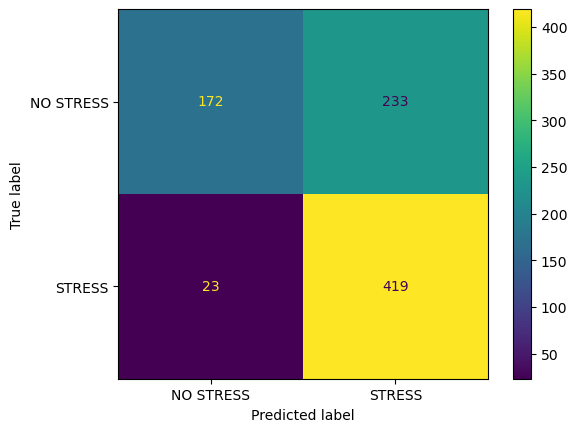

In [27]:
print("NAIVE-BAYES")
model_nb=MultinomialNB()
model_nb.fit(x_train,y_train)
y_nb=model_nb.predict(x_test)
print("CONFUSION MATRIX:\n",confusion_matrix(y_test,y_nb))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_nb))
print("ACCURACY SCORE:",accuracy_score(y_test,y_nb))
print("CLASSIFICATION REPORT:\n",classification_report(y_test,y_nb))

SUPPORT VECTOR
CONFUSION MATRIX:
 [[292 113]
 [105 337]]
ACCURACY SCORE: 0.7426210153482881
CLASSIFICATION REPORT:
               precision    recall  f1-score   support

   NO STRESS       0.74      0.72      0.73       405
      STRESS       0.75      0.76      0.76       442

    accuracy                           0.74       847
   macro avg       0.74      0.74      0.74       847
weighted avg       0.74      0.74      0.74       847



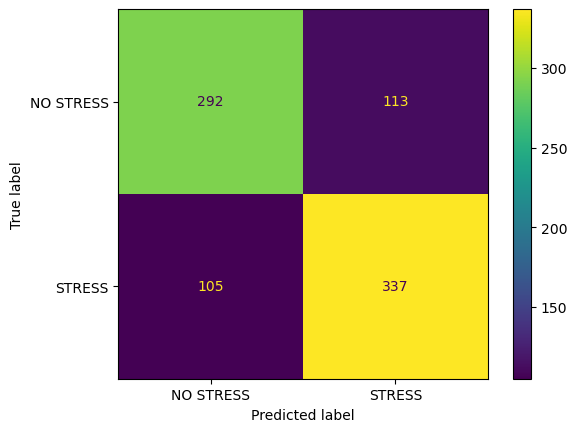

In [28]:
print("SUPPORT VECTOR")
model_svm=SVC()
model_svm.fit(x_train,y_train)
y_svm=model_svm.predict(x_test)
print("CONFUSION MATRIX:\n",confusion_matrix(y_test,y_svm))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_svm))
print("ACCURACY SCORE:",accuracy_score(y_test,y_svm))
print("CLASSIFICATION REPORT:\n",classification_report(y_test,y_svm))

DECISION TREE
CONFUSION MATRIX:
 [[231 174]
 [147 295]]
ACCURACY SCORE: 0.6210153482880756
CLASSIFICATION REPORT:
               precision    recall  f1-score   support

   NO STRESS       0.61      0.57      0.59       405
      STRESS       0.63      0.67      0.65       442

    accuracy                           0.62       847
   macro avg       0.62      0.62      0.62       847
weighted avg       0.62      0.62      0.62       847



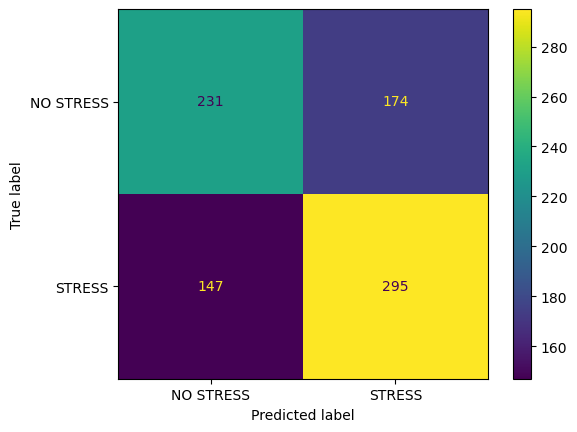

In [29]:
print("DECISION TREE")
model_dt=DecisionTreeClassifier()
model_dt.fit(x_train,y_train)
y_dt=model_dt.predict(x_test)
print("CONFUSION MATRIX:\n",confusion_matrix(y_test,y_dt))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_dt))
print("ACCURACY SCORE:",accuracy_score(y_test,y_dt))
print("CLASSIFICATION REPORT:\n",classification_report(y_test,y_dt))

RANDOM FOREST
CONFUSION MATRIX:
 [[247 158]
 [ 78 364]]
ACCURACY SCORE: 0.7213695395513577
CLASSIFICATION REPORT:
               precision    recall  f1-score   support

   NO STRESS       0.76      0.61      0.68       405
      STRESS       0.70      0.82      0.76       442

    accuracy                           0.72       847
   macro avg       0.73      0.72      0.72       847
weighted avg       0.73      0.72      0.72       847



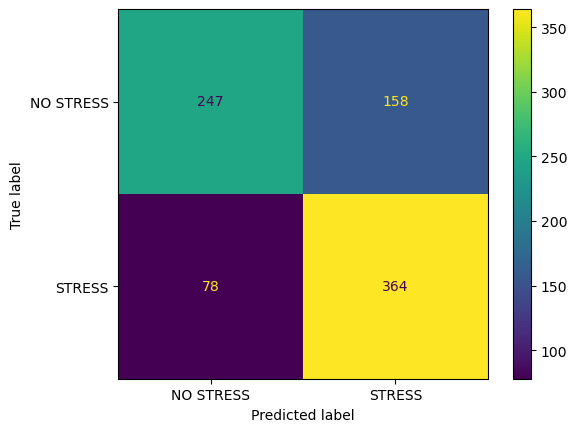

In [30]:
print("RANDOM FOREST")
model_rf=RandomForestClassifier()
model_rf.fit(x_train,y_train)
y_rf=model_rf.predict(x_test)
print("CONFUSION MATRIX:\n",confusion_matrix(y_test,y_rf))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_rf))
print("ACCURACY SCORE:",accuracy_score(y_test,y_rf))
print("CLASSIFICATION REPORT:\n",classification_report(y_test,y_rf))

In [31]:
# COMPARING THE ACCURACY SCORES OF ALL THE CLASSIFIERS
lst=[model_knn,model_nb,model_svm,model_dt,model_rf]
model=['KNN','NB','SVM','DECISION TREE','RANDOM FOREST']
lst_acc=[]
for i in lst:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  lst_acc.append(accuracy_score(y_test,y_pred))

acc_df=pd.DataFrame({'ALGORITHM':model,'ACCURACY_SCORE':lst_acc})
acc_df.sort_values(by='ACCURACY_SCORE',ascending=False,inplace=True)
acc_df

,ALGORITHM,ACCURACY_SCORE
2,SVM,0.742621
4,RANDOM FOREST,0.726092
1,NB,0.697757
0,KNN,0.644628
3,DECISION TREE,0.590319


<Axes: xlabel='ALGORITHM', ylabel='ACCURACY_SCORE'>

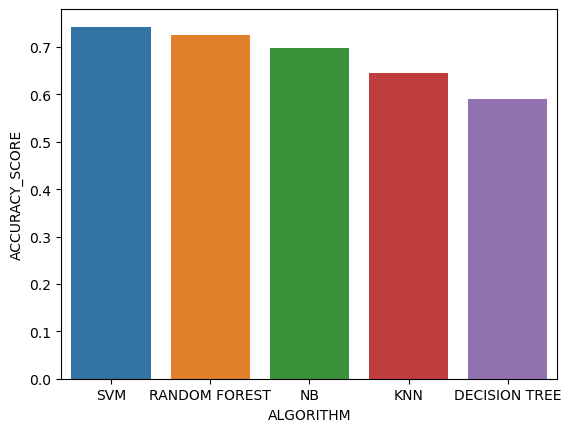

In [32]:
sns.barplot(x='ALGORITHM',y='ACCURACY_SCORE',data=acc_df)

**FINAL VERIFICATION WITH SVM: using input text from online users**

In [33]:
person1=input('ENTER THE TEXT:')
data=vec.transform([person1]).toarray()
y_out=model_svm.predict(data)

ENTER THE TEXT:I am sad


In [34]:
y_out=model_svm.predict(data)
print(y_out)

['STRESS']


In [ ]:
person2=input('ENTER THE TEXT:')
data1=vec.transform([person2]).toarray()

In [46]:
y_out1=model_svm.predict(data1)
print(y_out1)

['NO STRESS']
